In [1]:
#Import the csv 
import pandas as pd

imdbdata = pd.read_csv('imdb.csv', sep=":", header = None)

In [2]:
imdbdata.head()

,0,1,2,3,4,5,6,7
0,780354\tnm0000965\tDanny Boyle,nm0000965,I,nm0000965,tt8079248,tt8079248\tnm0000965,780354.44,"movie\tYesterday\t2019\t116\tComedy,Fantasy,Music"
1,788339\tnm0583600\tNancy Meyers,nm0583600,I,nm0583600,tt0120783,tt0120783\tnm0583600,788339.50,"movie\tThe Parent Trap\t1998\t128\tAdventure,C..."
2,790272\tnm0126096\tJames Ward Byrkit,nm0126096,I,nm0126096,tt2866360,tt2866360\tnm0126096,790272.00,"movie\tCoherence\t2013\t89\tDrama,Horror,Mystery"
3,794156\tnm1834213\tGary McKendry,nm1834213,I,nm1834213,tt1448755,tt1448755\tnm1834213,794156.80,"movie\tKiller Elite\t2011\t116\tAction,Crime,T..."
4,795374\tnm0193485\tRichard Curtis,nm0193485,I,nm0193485,tt1131729,tt1131729\tnm0193485,795374.20,"movie\tPirate Radio\t2009\t135\tComedy,Drama,M..."


In [3]:
#We will rename our columns as thus

#Column 0 as Director details
#Column 1 as Director ID
#Column 2 will be dropped
#Column 3 will be dropped
#Column 4 as Title ID
#Column 5 will be dropped as it is a concatenation of column 4 & 7
#Column 6 as Product rating
#Column 7 as Movie details

#Let's begin with dropped nececcary columns

In [4]:
list(imdbdata.columns)

[0, 1, 2, 3, 4, 5, 6, 7]

In [5]:
imdbdata = imdbdata.drop([2,3,5], axis = 1)

In [6]:
imdbdata.head()

,0,1,4,6,7
0,780354\tnm0000965\tDanny Boyle,nm0000965,tt8079248,780354.44,"movie\tYesterday\t2019\t116\tComedy,Fantasy,Music"
1,788339\tnm0583600\tNancy Meyers,nm0583600,tt0120783,788339.50,"movie\tThe Parent Trap\t1998\t128\tAdventure,C..."
2,790272\tnm0126096\tJames Ward Byrkit,nm0126096,tt2866360,790272.00,"movie\tCoherence\t2013\t89\tDrama,Horror,Mystery"
3,794156\tnm1834213\tGary McKendry,nm1834213,tt1448755,794156.80,"movie\tKiller Elite\t2011\t116\tAction,Crime,T..."
4,795374\tnm0193485\tRichard Curtis,nm0193485,tt1131729,795374.20,"movie\tPirate Radio\t2009\t135\tComedy,Drama,M..."


In [7]:
#Lets fix our director data
directordata = imdbdata[0].str.split('\t').apply(pd.Series)

In [8]:
directordata.head()

,0,1,2
0,780354,nm0000965,Danny Boyle
1,788339,nm0583600,Nancy Meyers
2,790272,nm0126096,James Ward Byrkit
3,794156,nm1834213,Gary McKendry
4,795374,nm0193485,Richard Curtis


In [9]:
#Rename the columns
directordata.columns = ['Product Rating', 'Director ID', 'Directors First Name']

In [10]:
directordata.head()

,Product Rating,Director ID,Directors First Name
0,780354,nm0000965,Danny Boyle
1,788339,nm0583600,Nancy Meyers
2,790272,nm0126096,James Ward Byrkit
3,794156,nm1834213,Gary McKendry
4,795374,nm0193485,Richard Curtis


In [11]:
#Lets fix our movie data
moviedata = imdbdata[7].str.split('\t').apply(pd.Series)

In [12]:
moviedata.head()

,0,1,2,3,4
0,movie,Yesterday,2019,116,"Comedy,Fantasy,Music"
1,movie,The Parent Trap,1998,128,"Adventure,Comedy,Drama"
2,movie,Coherence,2013,89,"Drama,Horror,Mystery"
3,movie,Killer Elite,2011,116,"Action,Crime,Thriller"
4,movie,Pirate Radio,2009,135,"Comedy,Drama,Music"


In [13]:
#Rename the columns
moviedata.columns = ['Title Type', 'Title Name', 'Start Year', 'Title Duration', 'Genre']

In [14]:
moviedata.head()

,Title Type,Title Name,Start Year,Title Duration,Genre
0,movie,Yesterday,2019,116,"Comedy,Fantasy,Music"
1,movie,The Parent Trap,1998,128,"Adventure,Comedy,Drama"
2,movie,Coherence,2013,89,"Drama,Horror,Mystery"
3,movie,Killer Elite,2011,116,"Action,Crime,Thriller"
4,movie,Pirate Radio,2009,135,"Comedy,Drama,Music"


In [15]:
#Add to our original the fixed data
imdbdata = pd.concat([imdbdata, moviedata, directordata], axis = 1)
imdbdata.head()

,0,1,4,6,7,Title Type,Title Name,Start Year,Title Duration,Genre,Product Rating,Director ID,Directors First Name
0,780354\tnm0000965\tDanny Boyle,nm0000965,tt8079248,780354.44,"movie\tYesterday\t2019\t116\tComedy,Fantasy,Music",movie,Yesterday,2019,116,"Comedy,Fantasy,Music",780354,nm0000965,Danny Boyle
1,788339\tnm0583600\tNancy Meyers,nm0583600,tt0120783,788339.50,"movie\tThe Parent Trap\t1998\t128\tAdventure,C...",movie,The Parent Trap,1998,128,"Adventure,Comedy,Drama",788339,nm0583600,Nancy Meyers
2,790272\tnm0126096\tJames Ward Byrkit,nm0126096,tt2866360,790272.00,"movie\tCoherence\t2013\t89\tDrama,Horror,Mystery",movie,Coherence,2013,89,"Drama,Horror,Mystery",790272,nm0126096,James Ward Byrkit
3,794156\tnm1834213\tGary McKendry,nm1834213,tt1448755,794156.80,"movie\tKiller Elite\t2011\t116\tAction,Crime,T...",movie,Killer Elite,2011,116,"Action,Crime,Thriller",794156,nm1834213,Gary McKendry
4,795374\tnm0193485\tRichard Curtis,nm0193485,tt1131729,795374.20,"movie\tPirate Radio\t2009\t135\tComedy,Drama,M...",movie,Pirate Radio,2009,135,"Comedy,Drama,Music",795374,nm0193485,Richard Curtis


In [17]:
imdbdata = imdbdata.drop([0,1,6,7], axis = 1)
imdbdata.head()

,4,Title Type,Title Name,Start Year,Title Duration,Genre,Product Rating,Director ID,Directors First Name
0,tt8079248,movie,Yesterday,2019,116,"Comedy,Fantasy,Music",780354,nm0000965,Danny Boyle
1,tt0120783,movie,The Parent Trap,1998,128,"Adventure,Comedy,Drama",788339,nm0583600,Nancy Meyers
2,tt2866360,movie,Coherence,2013,89,"Drama,Horror,Mystery",790272,nm0126096,James Ward Byrkit
3,tt1448755,movie,Killer Elite,2011,116,"Action,Crime,Thriller",794156,nm1834213,Gary McKendry
4,tt1131729,movie,Pirate Radio,2009,135,"Comedy,Drama,Music",795374,nm0193485,Richard Curtis


In [19]:
imdbdata.rename(columns = {4:'Title ID'}, inplace = True)
imdbdata.head()

,Title ID,Title Type,Title Name,Start Year,Title Duration,Genre,Product Rating,Director ID,Directors First Name
0,tt8079248,movie,Yesterday,2019,116,"Comedy,Fantasy,Music",780354,nm0000965,Danny Boyle
1,tt0120783,movie,The Parent Trap,1998,128,"Adventure,Comedy,Drama",788339,nm0583600,Nancy Meyers
2,tt2866360,movie,Coherence,2013,89,"Drama,Horror,Mystery",790272,nm0126096,James Ward Byrkit
3,tt1448755,movie,Killer Elite,2011,116,"Action,Crime,Thriller",794156,nm1834213,Gary McKendry
4,tt1131729,movie,Pirate Radio,2009,135,"Comedy,Drama,Music",795374,nm0193485,Richard Curtis


In [ ]:
#Get top 50 directors for the last 
#Get top genres
#Get top title types
#Get average duration for top 10 movies in last 20 years


In [49]:
#Let us convert our numeric columns

imdbdata['Product Rating'] = pd.to_numeric(imdbdata['Product Rating'])
imdbdata['Title Duration'] = pd.to_numeric(imdbdata['Title Duration'])

In [ ]:
imdbdata.info()

In [51]:
imdbdatatmp = imdbdata



<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 28 to 29
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title ID              100 non-null    object
 1   Title Type            100 non-null    object
 2   Title Name            100 non-null    object
 3   Start Year            100 non-null    object
 4   Title Duration        100 non-null    int64 
 5   Genre                 100 non-null    object
 6   Product Rating        100 non-null    int64 
 7   Director ID           100 non-null    object
 8   Directors First Name  100 non-null    object
dtypes: int64(2), object(7)
memory usage: 7.8+ KB


In [52]:
#Get top ten directors based on product rating
imdbdatatmp.sort_values(by=['Product Rating'], inplace = True, ascending = False)
imdbdatatmp.head(10)


,Title ID,Title Type,Title Name,Start Year,Title Duration,Genre,Product Rating,Director ID,Directors First Name
99,tt1375666,movie,Inception,2010,148,"Action,Adventure,Sci-Fi",18266170,nm0634240,Christopher Nolan
98,tt0434409,movie,V for Vendetta,2005,132,"Action,Drama,Sci-Fi",8491739,nm0574625,James McTeigue
97,tt0110357,movie,The Lion King,1994,88,"Adventure,Animation,Dramaloop",8039529,nm0021249,Roger Allers
96,tt1431045,movie,Deadpool,2016,108,"Action,Adventure,Comedy",7246544,nm1783265,Tim Miller
95,tt1454468,movie,Gravity,2013,91,"Drama,Sci-Fi,Thriller",5935814,nm0190859,Alfonso Cuarón
94,tt0796366,movie,Star Trek,2009,127,"Action,Adventure,Sci-Fi",4566642,nm0009190,J.J. Abrams
93,tt5052448,movie,Get Out,2017,104,"Horror,Mystery,Thriller",3816366,nm1443502,Jordan Peele
92,tt0234215,movie,The Matrix Reloaded,2003,138,"Action,Sci-Filoop",3725366,nm0905152,Lilly Wachowski
91,tt2306299,tvSeries,Vikings,2013,44,"Action,Adventure,Dramaloop",3683738,nm0935395,Katheryn Winnick
90,tt0945513,movie,Source Code,2011,93,"Action,Drama,Mystery",3643710,nm1512910,Duncan Jones


In [61]:
imdbdata['Title Type'].unique()

array(['tvMiniSeries', 'movie', 'tvEpisode', 'tvSeries'], dtype=object)

<AxesSubplot:>

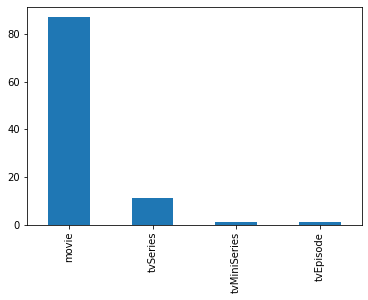

In [74]:
#Get top title type
import numpy as np
from matplotlib import pyplot as plt


imdbdatatmp['Title Type'].value_counts().plot(kind='bar')



In [32]:
imdbdata

,Title ID,Title Type,Title Name,Start Year,Title Duration,Genre,Product Rating,Director ID,Directors First Name
56,tt2948372,movie,Soul,2020,100,"Adventure,Animation,Comedyloop",1456420,nm5358492,Kemp Powers
59,tt2661044,tvSeries,The 100,2014,43,"Drama,Mystery,Sci-Filoop",1647968,nm4289392,Lindsey Morgan
12,tt4729430,movie,Klaus,2019,96,"Adventure,Animation,Comedyloop",872963,nm3582089,Carlos Martínez López
8,tt9561862,tvSeries,"Love, Death & Robots",2019,15,"Animation,Comedy,Fantasyloop",824602,nm3230254,Robert Valley
39,tt7984734,movie,The Lighthouse,2019,109,"Drama,Fantasy,Horror",1088137,nm3211470,Robert Eggers
...,...,...,...,...,...,...,...,...,...
37,tt0094291,movie,Wall Street,1987,126,"Crime,Drama",1067087,nm0000231,Oliver Stone
76,tt1320253,movie,The Expendables,2010,103,"Action,Adventure,Thriller",2121236,nm0000230,Sylvester Stallone
78,tt0472043,movie,Apocalypto,2006,139,"Action,Adventure,Drama",2274955,nm0000154,Mel Gibson
29,tt0106489,movie,A Bronx Tale,1993,121,"Crime,Drama,Romance",1003025,nm0000134,Robert De Niro
